In [ ]:
import numpy as np
import pandas as pd
print("library import---------! ")

library import---------! 


In [ ]:
index_val=[('cse',2019),('cse',2020),('cse',2021),('ece',2019),('ese',2020),('ese',2021),('eee',2019),('eee',2020)]

a=pd.Series(np.random.randn(8),index=index_val)

a

,0
"(cse, 2019)",-2.210289
"(cse, 2020)",-0.046724
"(cse, 2021)",0.569346
"(ece, 2019)",-1.135608
"(ese, 2020)",-0.606647
"(ese, 2021)",-1.295848
"(eee, 2019)",-0.839347
"(eee, 2020)",-0.277569


problem is amra chaileo just cse ke fatch korte parbo na tar jonno amader dorkar hobe multiindex er

In [ ]:
# multi_indexing call as panda -> hierarchical indexing

# creating proper multi index object
# pd.MultiIndex.from_tuples() ->index sysntex
# pd.MultiIndex.from_product()
index_val=[('cse',2019),('cse',2020),('cse',2021),('ece',2019),('ese',2020),('ese',2021),('eee',2024),('eee',2028)]
a=pd.MultiIndex.from_tuples(index_val)
b=pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]])
# working on cartisan product
b

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [ ]:
multi_index_seies=pd.Series(np.abs(np.random.randn(8)*100),index=b)

print(b.levels[0])
print(b.levels[1])

print(multi_index_seies)



Index(['cse', 'ece'], dtype='object')
Index([2019, 2020, 2021, 2022], dtype='int64')
cse  2019     81.107952
     2020    112.216978
     2021     28.147724
     2022      0.047655
ece  2019    108.733553
     2020     23.031571
     2021    231.870600
     2022     26.521829
dtype: float64


In [ ]:
# how to items fatch on this such a series
multi_index_seies['cse']
multi_index_seies['cse'][2020]


np.float64(112.21697817419947)

In [ ]:
temp=multi_index_seies.unstack()

temp.stack()

cse  2019     81.107952
     2020    112.216978
     2021     28.147724
     2022      0.047655
ece  2019    108.733553
     2020     23.031571
     2021    231.870600
     2022     26.521829
dtype: float64

In [ ]:
# multi_index Data frame
data={
    'sales':[100,200,500,400,200,600],
    'Expense':[50,40,100,600,400,500]

}

index_x=pd.MultiIndex.from_product([['Dhk','CTG'],[2012,2021,2023]])

df=pd.DataFrame(data,index=index_x)

df


sales  Expense
Dhk 2012    100       50
    2021    200       40
    2023    500      100
CTG 2012    400      600
    2021    200      400
    2023    600      500

<Axes: xlabel='level_0'>

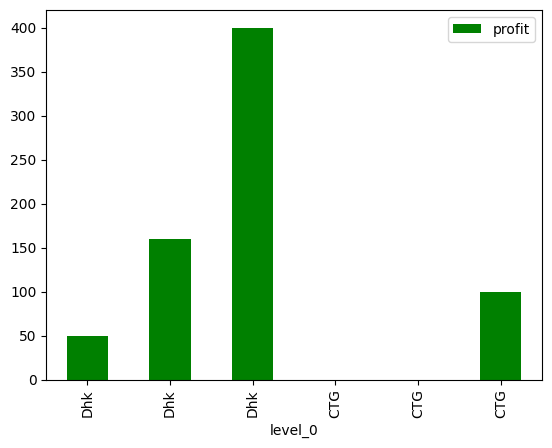

In [ ]:
def zero(value):
  if value>0:
    return value
  else:
    return 0


df['profit']=(df['sales']-df['Expense']).apply(zero)


df

colors=df.profit.apply(lambda x: 'green' if x>0 else 'red')

df.reset_index().plot(x='level_0',y='profit',kind='bar',color=colors.tolist())

In [ ]:
# 5D represent of data
bangladesh_df=pd.DataFrame(
   [ [1,2,9,6],
     [2,3,5,7],
     [9,7,3,1],
     [3,5,7,9],

     [1,2,9,6],
     [2,3,5,7],
     [9,7,3,1],
     [3,5,7,9],

   ],index = pd.MultiIndex.from_product([['cse','EEE'],[2018,2019,2020,2021]]),
    columns = pd.MultiIndex.from_product([['Bangladesh'],['Dhaka','Khulna'],['avg_package','Student']])

                       )
print(bangladesh_df)

branch_df=pd.DataFrame(
   [ [1,4,9,7],
     [7,3,9,7],
     [9,8,4,1],
     [6,5,1,9],

     [1,4,9,7],
     [2,3,2,7],
     [8,7,5,1],
     [7,5,7,9],

   ],index = pd.MultiIndex.from_product([['cse','EEE'],[2018,2019,2020,2021]]),
    columns = pd.MultiIndex.from_product([['India'],['Mumbai','Kolkata'],['avg_package','Student']])

                       )
print(branch_df)

country=bangladesh_df.merge(branch_df,left_index=True,right_index=True)
country


          Bangladesh                            
               Dhaka              Khulna        
         avg_package Student avg_package Student
cse 2018           1       2           9       6
    2019           2       3           5       7
    2020           9       7           3       1
    2021           3       5           7       9
EEE 2018           1       2           9       6
    2019           2       3           5       7
    2020           9       7           3       1
    2021           3       5           7       9
               India                            
              Mumbai             Kolkata        
         avg_package Student avg_package Student
cse 2018           1       4           9       7
    2019           7       3           9       7
    2020           9       8           4       1
    2021           6       5           1       9
EEE 2018           1       4           9       7
    2019           2       3           2       7
    2020           8

Bangladesh                                   India          \
               Dhaka              Khulna              Mumbai           
         avg_package Student avg_package Student avg_package Student   
cse 2018           1       2           9       6           1       4   
    2019           2       3           5       7           7       3   
    2020           9       7           3       1           9       8   
    2021           3       5           7       9           6       5   
EEE 2018           1       2           9       6           1       4   
    2019           2       3           5       7           2       3   
    2020           9       7           3       1           8       7   
    2021           3       5           7       9           7       5   

                              
             Kolkata          
         avg_package Student  
cse 2018           9       7  
    2019           9       7  
    2020           4       1  
    2021           1       9  
EEE 2018           9       7  
    2019           2       7  
    2020           5       1  
    2021           7       9

In [ ]:
# stacking and unstacking

# series er uppor stack kaj kore na

bangladesh_df.stack().unstack()


/tmp/ipython-input-2935438444.py:5: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  bangladesh_df.stack().unstack()


Bangladesh                                
              Dhaka              Khulna            
            Student avg_package Student avg_package
EEE 2018          2           1       6           9
    2019          3           2       7           5
    2020          7           9       1           3
    2021          5           3       9           7
cse 2018          2           1       6           9
    2019          3           2       7           5
    2020          7           9       1           3
    2021          5           3       9           7

In [ ]:
# df er shob kaj kora jebe
country.head()
country.shape
country.info()



<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', np.int64(2018)) to ('EEE', np.int64(2021))
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   (Bangladesh, Dhaka, avg_package)   8 non-null      int64
 1   (Bangladesh, Dhaka, Student)       8 non-null      int64
 2   (Bangladesh, Khulna, avg_package)  8 non-null      int64
 3   (Bangladesh, Khulna, Student)      8 non-null      int64
 4   (India, Mumbai, avg_package)       8 non-null      int64
 5   (India, Mumbai, Student)           8 non-null      int64
 6   (India, Kolkata, avg_package)      8 non-null      int64
 7   (India, Kolkata, Student)          8 non-null      int64
dtypes: int64(8)
memory usage: 1.2+ KB


In [ ]:
country.sort_index(ascending=False)

Bangladesh                                   India          \
               Dhaka              Khulna              Mumbai           
         avg_package Student avg_package Student avg_package Student   
cse 2021           3       5           7       9           6       5   
    2020           9       7           3       1           9       8   
    2019           2       3           5       7           7       3   
    2018           1       2           9       6           1       4   
EEE 2021           3       5           7       9           7       5   
    2020           9       7           3       1           8       7   
    2019           2       3           5       7           2       3   
    2018           1       2           9       6           1       4   

                              
             Kolkata          
         avg_package Student  
cse 2021           1       9  
    2020           4       1  
    2019           9       7  
    2018           9       7  
EEE 2021           7       9  
    2020           5       1  
    2019           2       7  
    2018           9       7

In [ ]:
death= pd.read_csv('/content/time_series_covid19_deaths_global.csv')
confirmed=pd.read_csv('/content/time_series_covid19_confirmed_global.csv')

death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4022,4022,4023,4023,4024,4024,4024,4024


In [ ]:
death_new=death.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='Death_count')


death_new




,Province/State,Country/Region,Lat,Long,date,Death_count
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,5708
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,0
311250,NaN,Yemen,15.552727,48.516388,1/2/23,2159
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,4024


In [ ]:
confirmed_new=confirmed.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='Confirmed_count')

confirmed_new

,Province/State,Country/Region,Lat,Long,date,Confirmed_count
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661


In [ ]:
merge_df=pd.merge(death_new,confirmed_new,on=['Province/State','Country/Region','Lat','Long','date'])


merge_df
final=merge_df.groupby(['Country/Region','date'])[['Confirmed_count','Death_count']].max()
final





Confirmed_count  Death_count
Country/Region date                                 
Afghanistan    1/1/21             52513         2201
               1/1/22            158107         7356
               1/1/23            207616         7849
               1/10/21            53489         2277
               1/10/22           158394         7373
...                                 ...          ...
Zimbabwe       9/8/21            125931         4517
               9/8/22            256834         5596
               9/9/20              7429          222
               9/9/21            126056         4521
               9/9/22            256859         5596

[216477 rows x 2 columns]